# Titanic Dataset Exploratory Data Analysis

### Column meta

- PassengerID   -   Passenger ID
- Survived      -   Weather Survived or not: 0 = No, 1 = Yes
- Pclass        -   Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
- Name          -   Name of the Passenger
- Sex           -   Gender
- Age           -   Age in Years
- SibSp         -   No. of siblings / spouses aboard the Titanic
- Parch         -   No. of parents / children aboard the Titanic
- Ticket        -   Ticket number
- Fare          -   Passenger fare
- Cabin         -   Cabin number
- Embarked      -   Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

### Questions

Some generic questions to give an initial direction. Additional questions might be added throughout the notebook.

1. What is the gender ratio on board?

2. How does the age distribution look like?

3. How were ticket classes priced?

4. Can we see a correlation with the age of the passengers and the ticket class they had?

5. Are older passengers wealthier?

6. What is the gender ratio of passengers traveling alone?

7. Did passengers traveling alone have better or worse survival rate?

8. How did the "Women and children" rule affect the survival rate of these two groups? (Children will be counted as <=12 years old)

---

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [76]:
df = pd.read_csv('data/titanic.csv', index_col='PassengerId')

In [77]:
df.shape

(891, 11)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [79]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [80]:
df.duplicated().sum()

np.int64(0)

No duplicate rows

In [81]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

~ 20% of Age data is missing

~ 77% of Cabin data is missing

In [82]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
df['Age'].sort_values().head(10)

PassengerId
804    0.42
756    0.67
645    0.75
470    0.75
79     0.83
832    0.83
306    0.92
387    1.00
173    1.00
184    1.00
Name: Age, dtype: float64

In [84]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


---

### Is 0.0 Fare an error/missing value in the data? Were there actual passengers on board for free?

In [85]:
(df['Fare']==0.0).value_counts()

Fare
False    876
True      15
Name: count, dtype: int64

In [86]:
df_zero_fare = df[df['Fare']==0.0]
df_zero_fare

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [87]:
df_zero_fare['Pclass'].value_counts()

Pclass
2    6
1    5
3    4
Name: count, dtype: int64

### Note

There are 15 records with 0.0 fare. They are almost uniformly distributed between the classes. There doesnt seem to be a clearly identifiable pattern. Going to handle them as missing values.

In [88]:
df['Fare'] = df['Fare'].replace(to_replace=0.0, value=pd.NA)

---

### Q1 - What is the gender ratio on board?

<Axes: title={'center': 'Gender distribution'}, ylabel='count'>

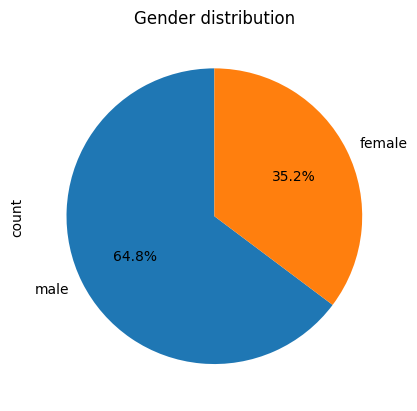

In [89]:
df['Sex'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', title='Gender distribution')

---

Other distributions

<Axes: title={'center': 'Survived distribution'}, ylabel='count'>

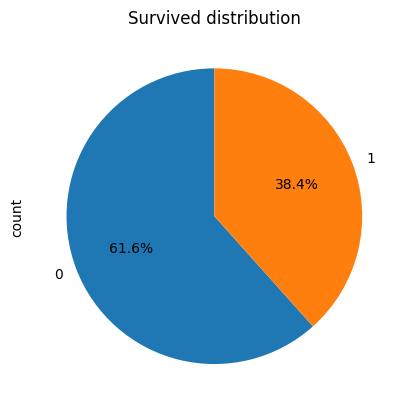

In [90]:
df['Survived'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', title='Survived distribution')

<Axes: title={'center': 'Pclass distribution'}, ylabel='count'>

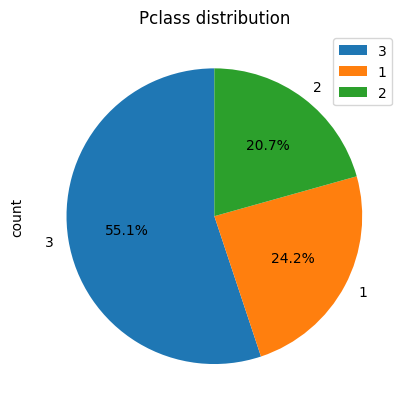

In [91]:
df['Pclass'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', legend=True, title='Pclass distribution')

---

### Q2 - How does the age distribution look like?

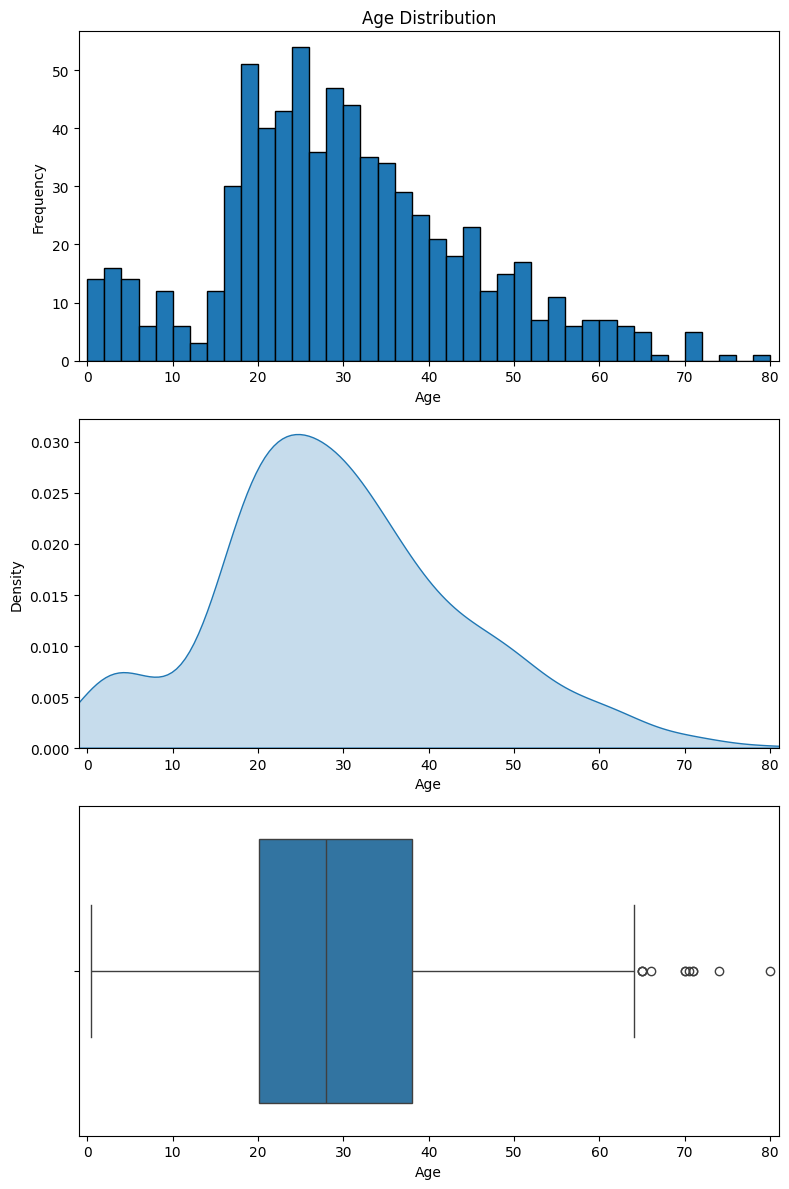

In [92]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

bins = np.linspace(0, 80, 41)
df['Age'].plot(kind='hist', bins=bins, edgecolor='black', alpha=1, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(-1, df['Age'].max() + 1)

sns.kdeplot(df['Age'], fill=True, ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')
axes[1].set_xlim(-1, df['Age'].max() + 1)

sns.boxplot(x=df['Age'], ax=axes[2])
axes[2].set_xlim(-1, df['Age'].max() + 1)

plt.tight_layout()

Lets color the histogram by using the Survived column

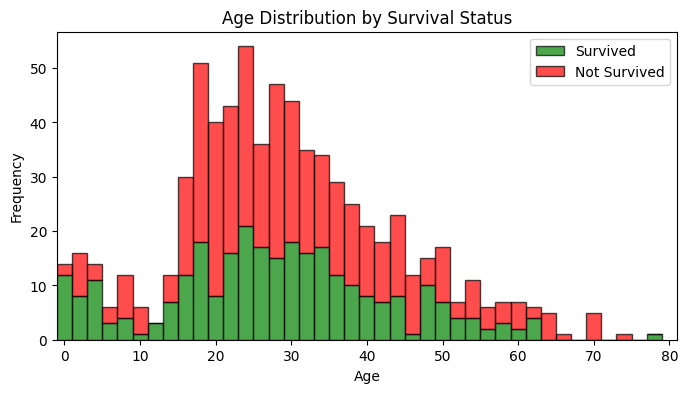

In [93]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

survived_hist, _ = np.histogram(survived['Age'], bins)
not_survived_hist, _ = np.histogram(not_survived['Age'], bins)

plt.figure(figsize=(8, 4))
plt.bar(
    bins[:-1],
    survived_hist,
    width=np.diff(bins),
    color='green',
    edgecolor='black',
    alpha=0.7,
    label='Survived'
)
plt.bar(
    bins[:-1],
    not_survived_hist,
    width=np.diff(bins),
    bottom=survived_hist,
    color='red',
    edgecolor='black',
    alpha=0.7,
    label='Not Survived'
)

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.xlim(-1, 81)

# Add a legend
plt.legend()

---

### Q3 - How were ticket classes priced?

---

<Axes: xlabel='Pclass', ylabel='Fare'>

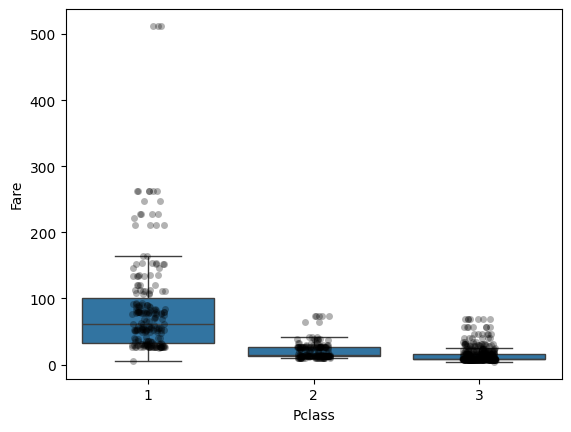

In [94]:
non_zero_fares = df[df['Fare'] > 0]
sns.boxplot(x='Pclass', y='Fare', data=non_zero_fares, showfliers=False)
sns.stripplot(x='Pclass', y='Fare', data=non_zero_fares, color='black', alpha=0.3)

1. Ticket class 2 and 3 does not seem to be too distinct by ticket price

2. Ticket class 1 has some extremely pricey tickets, although these could be for some luxurious cabins

3. Ticket class 1 has at least one very cheap ticket. This could be an error in the data

In [95]:
non_zero_fares[non_zero_fares['Pclass']==1].sort_values('Fare').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S
663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,E58,S
169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.925,NaN,S
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S


It seems like the ticket class 1 has a record with 5 in the fare price, and the rest of the values are starting from 25+. The price of this cheap ticket is probably not correct or the Pclass value should be either 2 or 3.

---

### Q4 - Can we see a correlation with the age of the passengers and the ticket class they had?

             Age    Pclass
Age     1.000000 -0.369226
Pclass -0.369226  1.000000


Text(0, 0.5, 'Density')

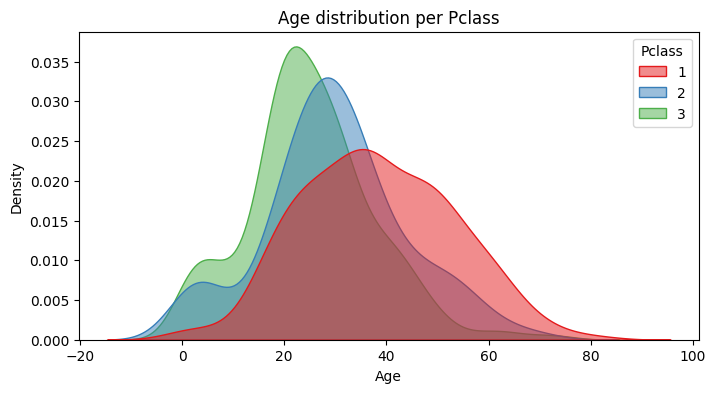

In [96]:
age_class = df[df['Age'].notnull()][['Age', 'Pclass']]
print(age_class.corr())

plt.figure(figsize=(8, 4))
sns.kdeplot(data=age_class, x='Age', hue='Pclass', fill=True, common_norm=False, alpha=0.5, palette='Set1')

plt.title('Age distribution per Pclass')
plt.xlabel('Age')
plt.ylabel('Density')

Looks like there is some correlation between Age and Pclass

---

### Q5 - Are older passengers wealthier?

Based on the plot above, we could say that they seem to be wealthier only looking at the Pclass, but we can also check the ticket prices to have a better idea

/tmp/ipykernel_72247/38310504.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_fare = df[df['Age'].notnull()][['Age', 'Fare']][df['Fare']>200]


Text(0, 0.5, 'Fare')

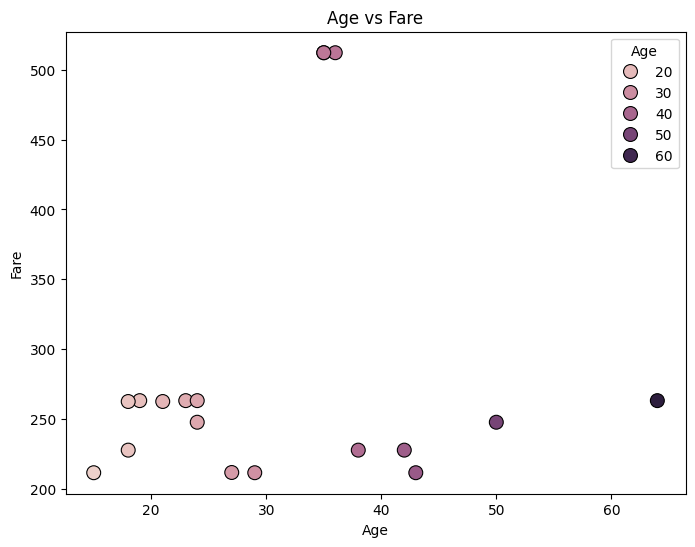

In [97]:
age_fare = df[df['Age'].notnull()][['Age', 'Fare']][df['Fare']>200]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=age_fare, x='Age', y='Fare', hue='Age', edgecolor='black', s=100)
# sns.boxplot(data=age_fare, x='Age', color='lightblue')

plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

The wealthiest individuals seems to be more on the younger side. Most of the higher priced tickets were bought by people younger than 45 years, and more than half of these tickets were bought by people under 30.

---

### Q6 - What is the gender ratio of passengers traveling alone?

We gonna define traveling alone as someone who has no relatives and no spouse on board.

In [98]:
df_alone = df[(df['SibSp'] == 0) & (df['Parch'] == 0)]
df_alone.shape

(537, 11)

<Axes: title={'center': 'Gender distribution'}, ylabel='count'>

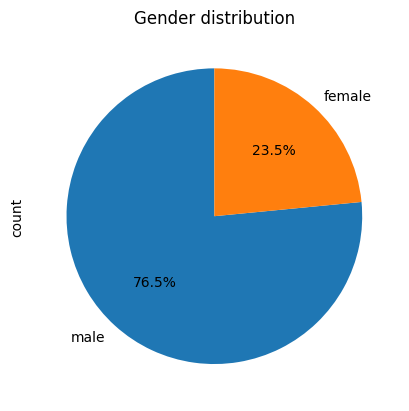

In [99]:
df_alone['Sex'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', title='Gender distribution')

There seems to be a higher percentage of man traveling alone on the ship

---

### Q7 - Did passengers traveling alone have better or worse survival rate?

In [100]:
df_not_alone = df[(df['SibSp'] != 0) | (df['Parch'] != 0)]
df_not_alone['Survived'].value_counts(normalize=True)

Survived
1    0.50565
0    0.49435
Name: proportion, dtype: float64

In [101]:
df_alone['Survived'].value_counts(normalize=True)

Survived
0    0.696462
1    0.303538
Name: proportion, dtype: float64

Looks like people who traveled alone had a much worse survival rate. Could be contributed to the higher male to female ratio and that the children probably didnt travel alone. This combined with the "Women and children" rule at the life rafts could be the cause

---

### Q8 - How did the "Women and children" rule affect the survival rate of these two groups? (Children will be counted as <=12 years old)

In [102]:
favored_at_rafts = df[(df['Sex'] == 'female') | (0 < df['Age']) & (df['Age'] <= 12)]
favored_at_rafts.shape

(351, 11)

<Axes: title={'center': 'Survival rate of women and children'}, ylabel='proportion'>

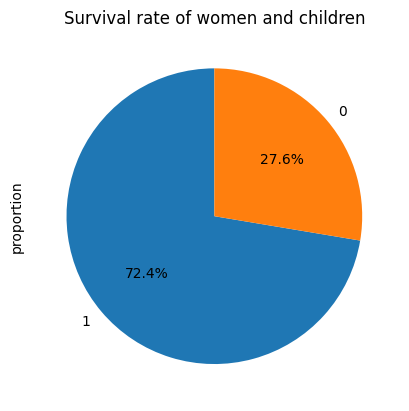

In [103]:
favored_at_rafts['Survived'].value_counts(normalize=True).plot(kind='pie', startangle=90, autopct='%1.1f%%', title='Survival rate of women and children')

In [104]:
male_adults = df[(df['Sex'] == 'male') & (df['Age'] > 12)]
male_adults.shape

(416, 11)

<Axes: title={'center': 'Survival rate of adult men'}, ylabel='proportion'>

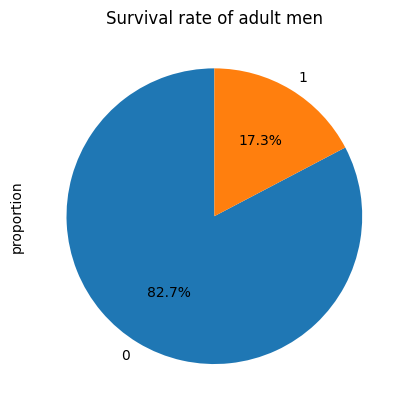

In [105]:
male_adults['Survived'].value_counts(normalize=True).plot(kind='pie', startangle=90, autopct='%1.1f%%', title='Survival rate of adult men')

These two plots seems to clearly show that women and children had a much better chance to survive than adult men

---

## Correlation

Generic correlation between the columns

<Axes: >

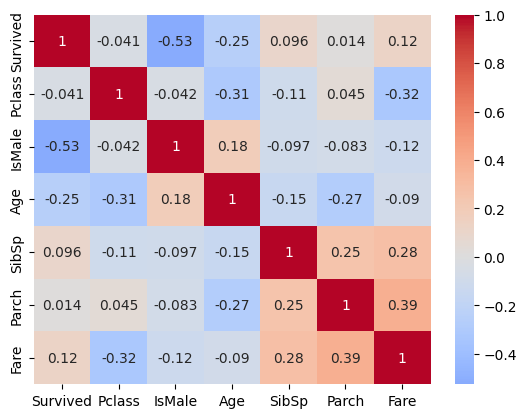

In [106]:
df['IsMale'] = df['Sex'] == 'male'
df_non_na = df.dropna()
df_numeric = df_non_na[['Survived', 'Pclass', 'IsMale', 'Age', 'SibSp', 'Parch', 'Fare']]
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

From this correlation matrix we could assume the following:

- Men in general had a worse chance to survive

- Pclass doesn't seem to have a significant impact on survival. I guess there was no priority life rafts for first class passengers

- Men and women seems to be evenly distributed between Pclasses

- A slight inverse correlation seems to emerge between the Age and Survived columns. Probably skewed by the children, who were saved regardless of gender, but moslty women survived from the older generations

- People traveling with family seems to have paid more for the tickets

## Pairplot of numeric values

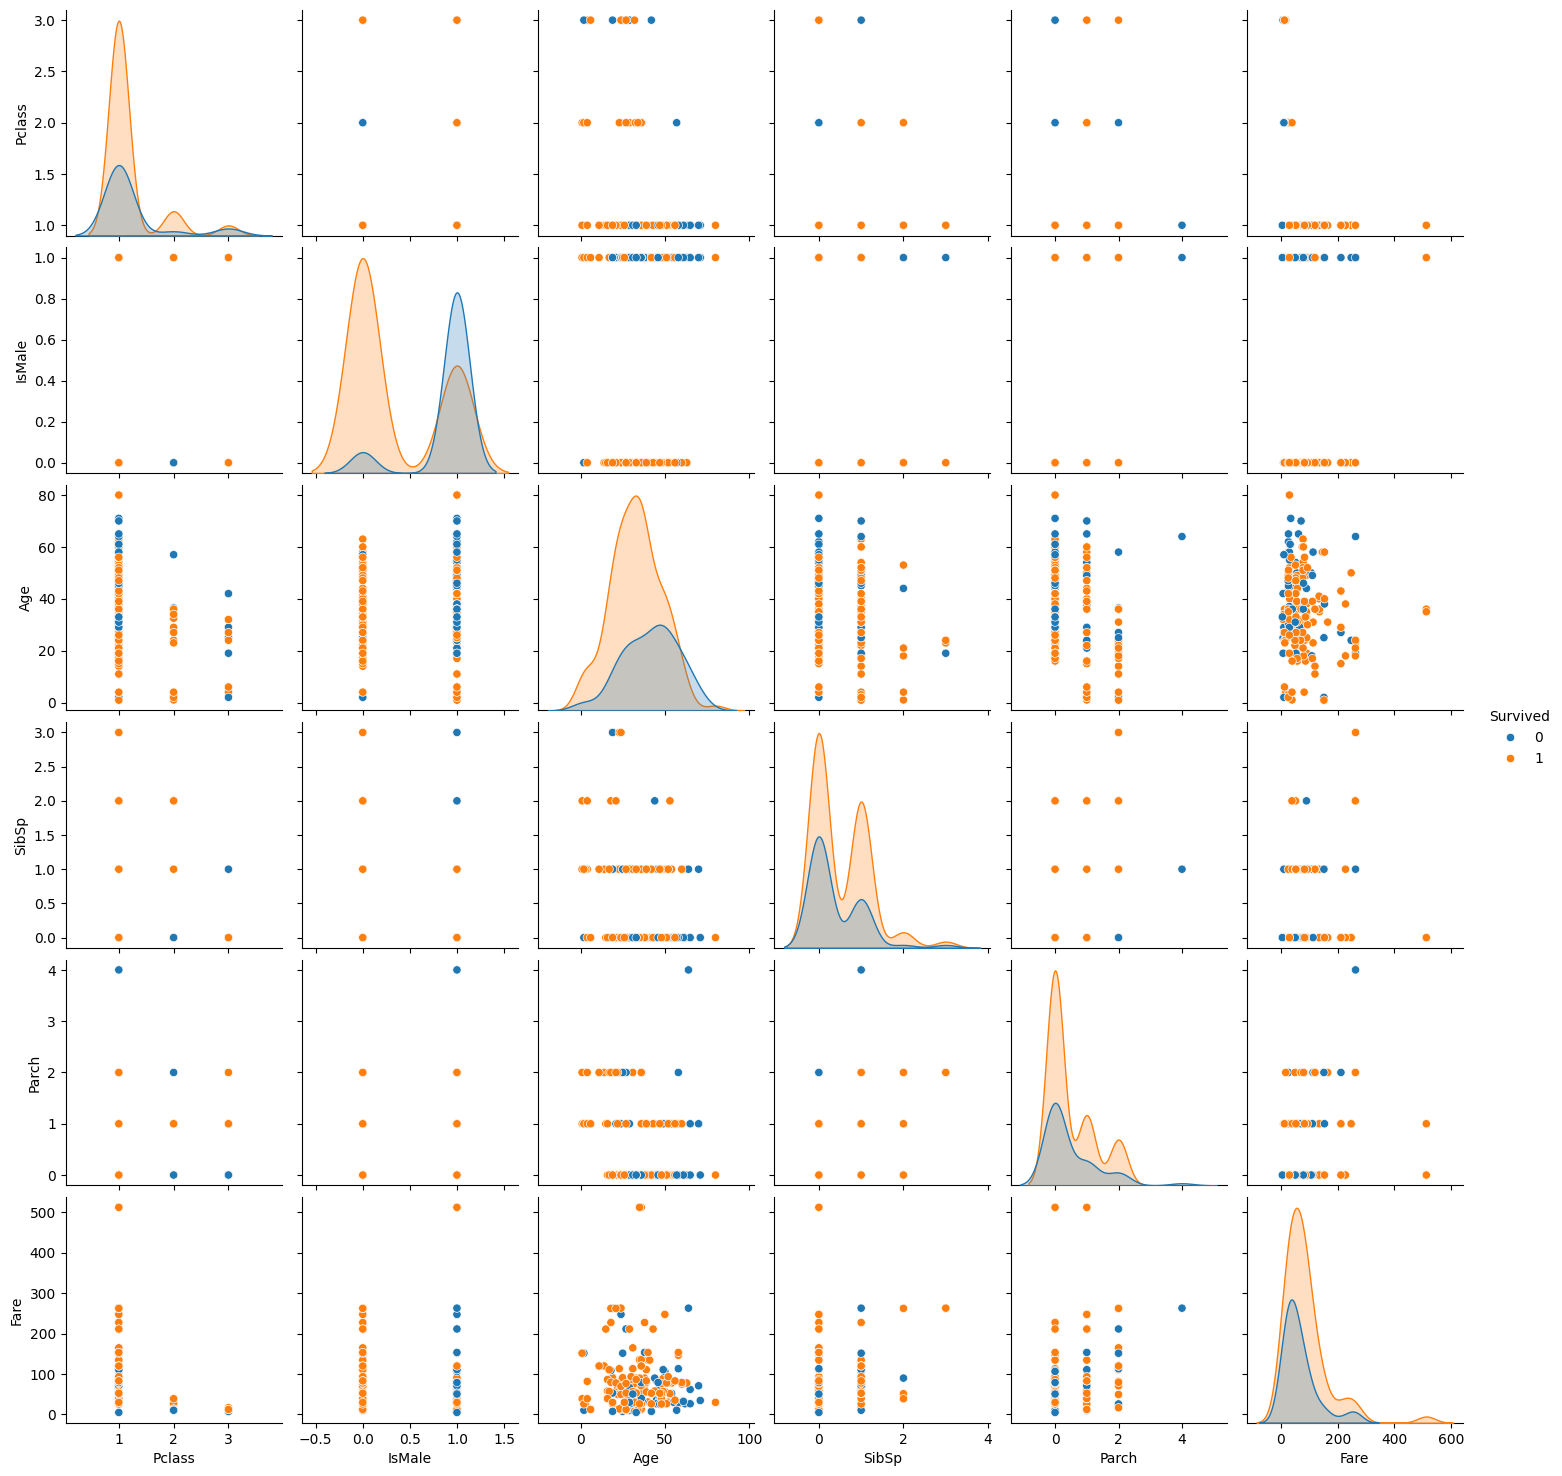

In [107]:
sns.pairplot(df_numeric, hue='Survived')

---

---

---

### Try to fill in the missing values

Starting with the embarked column as there are only two missing value

In [108]:
df_no_embark = df[df['Embarked'].isnull()]
df_no_embark

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,False
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,False


Check if there was someone else in their cabin. Maybe we could use their Embarked value

In [109]:
df[(df['Embarked'].notna()) & (df['Cabin'] == 'B28')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale
PassengerId,,,,,,,,,,,,


Maybe there is a correlation between the "B" cabins and where the Embark value

In [110]:
df[(df['Embarked'].notna()) & (df['Cabin'].str.startswith('B'))]['Embarked'].value_counts()

Embarked
S    23
C    22
Name: count, dtype: int64

In [111]:
df[(df['Embarked'].notna()) & (df['Cabin'].str.startswith('B'))][['Embarked', 'Survived']].value_counts()

Embarked  Survived
C         1           17
S         1           16
          0            7
C         0            5
Name: count, dtype: int64

In [112]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Let's use the most frequent value then... The Embarked column is probably not significant regarding the survival of the passenger. We found gender and age to be in the most impactful features anyways

The cabin column is mostly empty. We probably cant impute enough missing values for this column to make a significant impact on predicting the survival of the passenger

Missing Age data can be filled up with mean/median values or a regression model maybe

Missing Fare value could be imputed based on the Pclass or another passenger with the same ticket / cabin

In [113]:
df_zero_fare['Cabin'].drop_duplicates()

PassengerId
180     NaN
264     B94
807     A36
816    B102
Name: Cabin, dtype: object

In [114]:
df_zero_fare['Ticket'].drop_duplicates()

PassengerId
180      LINE
264    112059
278    239853
482    239854
634    112052
675    239856
733    239855
807    112050
816    112058
823     19972
Name: Ticket, dtype: object

In [125]:
if df[
    (df['Fare'].notna())
    & (df['Cabin'].isin(['B94', 'A36', 'B102']))
].size > 0:
    print('Match on Cabin')
else:
    print('Cant impute using Cabin column')

Cant impute using Cabin column


In [130]:
if df[
    (df['Fare'].notna())
    & (df['Ticket'].isin(['LINE', '112059', '239853', '239854', '112052', '239856', '239855', '112050', '112058', '19972']))
].size > 0:
    print('Match on Ticket')
else:
    print('Cant impute using Ticket column')

Cant impute using Ticket column


Well, looks like we have to use some statistical value here as well

In [129]:
df_zero_fare

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
